In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [5]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())

Yukarıda yapılan şudur: percentage_people_below_poverty_level değişkeninde tutulan veri setinde Geographic Area featuresini alır ve bu sütunun içerisindeki unique olan değerleri bulur. 

In [6]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Yukarıdaki kod çıktısında Amerika'daki eyaletleri görüyoruz.

In [7]:
len(percentage_people_below_poverty_level['Geographic Area'].unique())

51

Çıktıda Amerika'da 51 tane eyalet olduğunu görüyoruz. 

In [8]:
area_poverty_ratio = []

Yukarıdaki kod ile amaçlanan şudur: Eğer data'yı hiçbir sıralama yapmadan bar plot'a koyarsak, eyaletlerin sırasında bir görsel görürüz. Fakat azalan sırada bir görsel daha anlaşılır olacağından data'yı sıralamalıyız. Hadi bunu yapalım.

In [9]:
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

Yukarıda yapılanları açıklayalım.

x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i] satır ile, data'nın içerisinde önceden area_list'e kaydettiğimiz unique eyaletlerin her birini tek tek buluruz.

Bunu bulduktan sonra area_poverty_rate = sum(x.poverty_rate)/len(x) satırı ile poverty_rate'nin ortalamasını alırız. Ve bu ortalama değeri area_poverty_rate değişkeninde tutuyoruz.

Daha sonrada bu area_poverty_rate değişkenini daha önceden oluşturduğum area_poverty_ratio isimli listenin içerisine ekliyoruz.

In [10]:
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})

Yukarıda bir data frame oluşturdum. Bu data frame'in sütunlarından birisinin ismi area_list ve bir diğer sütun ismi area_poverty_ratio 'dir.

In [11]:
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values

ascending=False parametresinden dolayı azalan sırada bir sıralama gerçekleştirilir. Eğer bu parametre True değerine eşitlenseydi artan sırada bir sıralama gerçekleştirilirdi. Ve indeksleri çekiyorum.

In [12]:
sorted_data = data.reindex(new_index)

Azalan sıradaki sırayı sağlayan indekleri data'nın yeni indeksi yaptım.

Text(0.5, 1.0, 'Poverty Rate Given States')

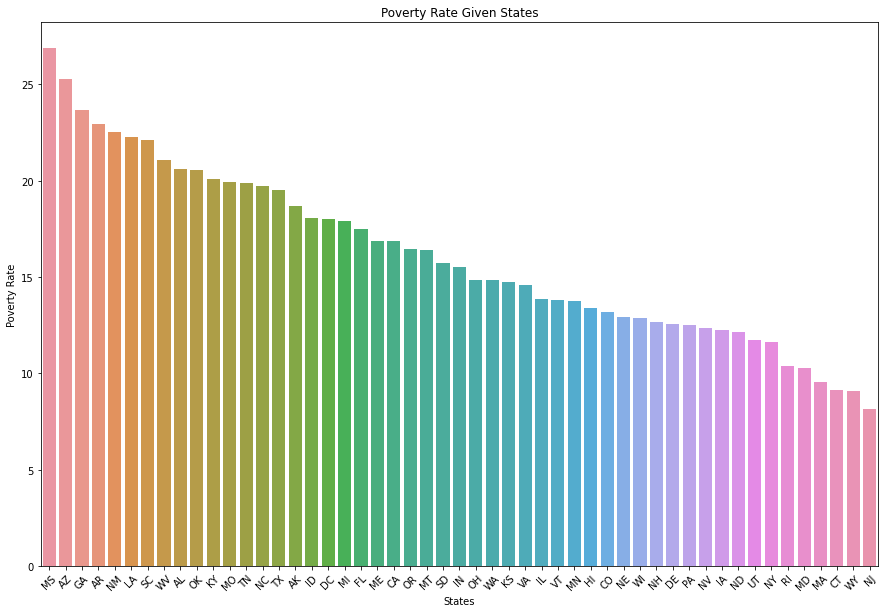

In [13]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

Yukarıda yapılanları açıklayalım. Artık görselleştirme gerçekleştirilmiştir. 

plt.figure(figsize=(15,10)) satırını yeni bir figür açmak için kullandım. Ve bu figürün eninin uzunluğunu 15, boyunun uzunluğunu 10 olarak ayarladım.

sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio']) satırı: x ekseninde sorted_data'nın area_list'i yani eyalet listesi ve y ekseninde sorted_data'nın area_poverty_ratio'su yani fakirlik oranı bulunmakta. 

plt.xticks(rotation= 45) satırı ile x ekseninde yazan ifadelerin konum açılarını belirlendim. Mesela 45 yerine 90 yazın ve farkı gözlemleyin.

plt.xlabel('States') ve plt.ylabel('Poverty Rate') astırları ile x ve y eksenlerine isim verdim.

plt.title('Poverty Rate Given States') satırı ile de figüre başlık verdim.

Böylece bar plot'lar halinde görselleştirerek insanların daha kolay anlayabilmesini sağlamış olduk.

Çıktıyı inceleyelim. x ekseninde görebileceğiniz LA ifadesi Los Angeles'dır. Los Angeles'ın fakirlik oranının yaklaşık %23 olduğunu görebiliyoruz. Ve Los Angeles'ın fakirlik oranı 6.sıradadır.

Fakirlik oranı en düşük olanın NJ olduğunu görebiliyoruz.

Haydi şimdi bir görselleştirme daha yapalım. Öldürülen insanların isimleri ve soyisimleri arasında en çok kullanılan 15 tanesini gösteren figürü çizelim. Bunun için kill değişkeninde tutulan veri setini kullanmalıyız. Öncelikle bu veri setinin içeriğine bakalım.

In [14]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Veri setinin içerisinde:

name sütunu: isimler bilgisini barındırır.

date sütunu: tarihler bilgisini barındırır.

manner_of_death sütunu: nasıl öldürüldüğü bilgisini barındırır.

armed sütunu: hangi silah ile öldürüldüğü bilgisini barındırır.

age sütunu: yaşı bilgisini barındırır.

gender sütunu: cinsiyeti bilgisini barındırır.

race sütunu: ırkı bilgisini barındırır.

city sütunu: yaşadığı şehir bilgisini barındırır.

state sütunu: eyaleti bilgisini barındırır.

Şimdi görselleştirme işlemine geçebiliriz.

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

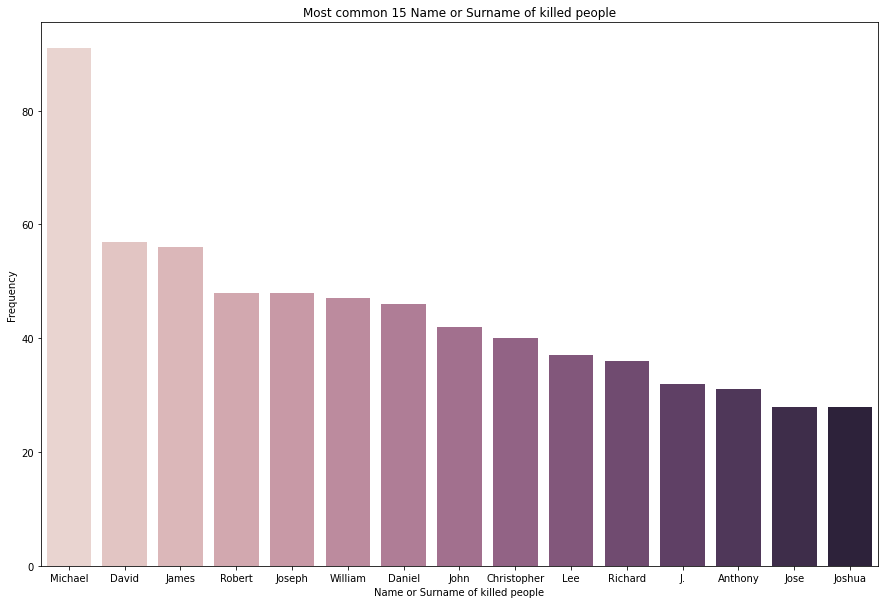

In [15]:
from collections import Counter

separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

Yukarıda yapılanlar şu şekildedir:

separate = kill.name[kill.name != 'TK TK'].str.split() satırında: kill veri setinden name sütununu aldım ve name sütununda 'TK TK' ismindeki değeri bulunduran satırlar dışındaki satırları str yaptım ve split() metodu ile şunu yaptım: Mesela isim 'Raziye Dogan' ise 'Raziye','dogan' şeklinde boşluktan ayırarak isim ve soyisim şeklinde ayırmış oldum. Ve bu işlemleri separate değişkenine atadık.

Ayrıca şunuda söylemeliyim ki, kill.name.value_counts() kodunu çalıştırdığınızda 49 tane 'TK TK' değerinin olduğunu göreceksiniz.

a,b = zip(*separate) satırı ile unzip işlemi yaptım. Yani a ve b değişkenlerine isim ve soyismi ayırıyor.

name_list = a+b satırında ayırdığım isim ve soyismi birleştiriyorum. Yani bir tuble'nin içerisinde aşağıdan yukarıya birleşmiş oldu.

name_count = Counter(name_list) satırı ile bir name'den kaç tane olduğunu tespit ettim.

most_common_names = name_count.most_common(15) satırında most_common metodunu kullanarak en çok olan 15 tanesini bul dedim.

Daha sonra x,y = zip(*most_common_names) satırı ile bunu da unzip yaptım. 

x,y = list(x),list(y) satırında x ve y listesini elde ettim.

ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x))) satırında bar plot ile x ve y olacak şekilde çizdim.

palette = sns.cubehelix_palette(len(x)) satırı çıktıda gördüğünüz figürdeki renkleri ifade ediyor. Bu metoda bir uzunluk değeri veriyoruz ve bu uzunluk değeri kadar birbiri ile uyumlu farklı renk döndürüyor.

Çıktıyı okuyalım. En çok Michael ismi bulunmakta ve yaklaşık 90 adet. 15.sıradaki isim Joshua 'dır.